In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [57]:
X_train.shape

(50000, 32, 32, 3)

We can see that there are 50000 images in the training set and it is of the dimension (32, 32) and 3 of channels

In [58]:
X_test.shape

(10000, 32, 32, 3)

We can see that for the test set it has 10000 images and it has same dimension as of training

In [0]:
img_rows = 32
img_cols = 32

In [0]:
from keras import backend as K

if K.image_data_format() == 'channel_first':
  X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols).astype('float32')
  input_size = (3, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3).astype('float32')
  input_size = (img_rows, img_cols, 3)

In [61]:
input_size

(32, 32, 3)

It seems like the input image is of size (32,32,3) with channel is at the last

## **Convlolutional Neural Networks Approach**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#one hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [65]:
y_train.shape

(50000, 10)

It looks like the dataset has 10 classes

In [0]:
num_classes = y_train.shape[1]

In [0]:
#building model

def build_classifier():
  
  #initialise the CNN
  classifier = Sequential()
  
  #first conv layer
  classifier.add(Conv2D(30, kernel_size=(5,5), input_shape=input_size, activation='relu'))
  
  #first pooling layer
  classifier.add(MaxPooling2D(pool_size=(2,2)))
  
  #second conv layer
  classifier.add(Conv2D(15, kernel_size=(5,5), activation='relu'))
  
  #second pooling layer
  classifier.add(MaxPooling2D(pool_size=(2,2)))
  
  #flatten
  classifier.add(Flatten())
  
  classifier.add(Dense(128, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(num_classes, activation='softmax'))
  classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return classifier

In [70]:
classifier_CNN = build_classifier()
history = classifier_CNN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=10, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 99s - loss: 1.7803 - acc: 0.3453 - val_loss: 1.5741 - val_acc: 0.4250
Epoch 2/10
 - 99s - loss: 1.4783 - acc: 0.4624 - val_loss: 1.4053 - val_acc: 0.4926
Epoch 3/10
 - 100s - loss: 1.3635 - acc: 0.5105 - val_loss: 1.3581 - val_acc: 0.5125
Epoch 4/10
 - 99s - loss: 1.2835 - acc: 0.5412 - val_loss: 1.2988 - val_acc: 0.5330
Epoch 5/10
 - 98s - loss: 1.2261 - acc: 0.5631 - val_loss: 1.2343 - val_acc: 0.5570
Epoch 6/10
 - 101s - loss: 1.1732 - acc: 0.5829 - val_loss: 1.1694 - val_acc: 0.5852
Epoch 7/10
 - 100s - loss: 1.1207 - acc: 0.6021 - val_loss: 1.1480 - val_acc: 0.5887
Epoch 8/10
 - 100s - loss: 1.0845 - acc: 0.6157 - val_loss: 1.1064 - val_acc: 0.6125
Epoch 9/10
 - 100s - loss: 1.0449 - acc: 0.6302 - val_loss: 1.1197 - val_acc: 0.6039
Epoch 10/10
 - 100s - loss: 1.0179 - acc: 0.6379 - val_loss: 1.0766 - val_acc: 0.6229


We have got the accuracy of 63% with valiation accuracy of around 62% with batch size of 300 and epoch 10. With further improvment in epochs and acitvation fucntion and adding more layers and more nuerons in the hidden layers can improve our performance. Keeping computational cost in mind we are not going to do it here.

In [71]:
scores = classifier_CNN.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 10s 955us/step


In [72]:
scores

[1.076622550201416, 0.6229]

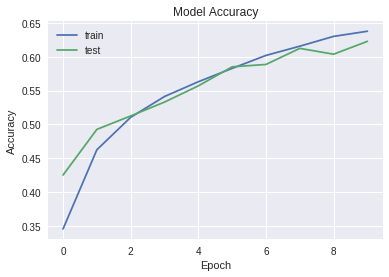

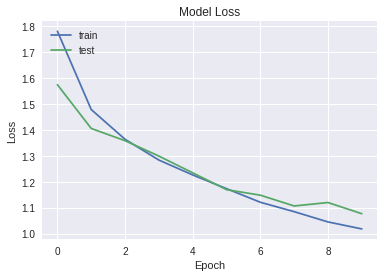

In [74]:
#history plot for accyracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

We can see that the both the training and test are around 63 in graph.